In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Data preprocessing
# Drop the 'Time' column
df = df.drop(['Time'], axis=1)

# Separate features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

# c. Encoder network
encoder = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')  # Latent representation
])

In [5]:
# d. Decoder network
decoder = keras.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(X_train.shape[1], activation='linear')  # Output layer
])

# Combine encoder and decoder to create the autoencoder model
autoencoder = keras.Sequential([
    encoder,
    decoder
])

In [14]:

# e. Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
history=autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1524 - mse: 0.1524 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 954us/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0572 - mse: 0.0572 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━

In [15]:
predictions=autoencoder.predict(X_test)
mse=np.mean((X_test-predictions)**2,axis=1)
print(mse,"\n")
threshold=np.percentile(mse,95)
y_test_pred=np.where(mse>threshold,1,0)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step
[2.98996516 0.01627325 0.00423724 ... 0.02427131 0.02027499 0.50642774] 



In [16]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_test_pred)
accuracy

0.9511077560478916

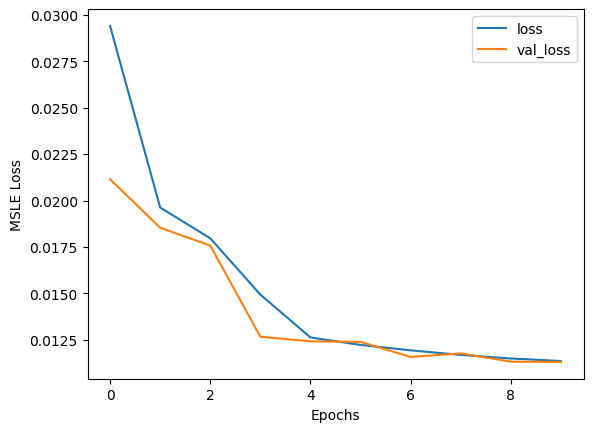

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()